## ENCODING AMINO ACID SEQUENCES OF PROTEINS INTO COMPLEX NUMBERS AND CLASSIFICATION USING EVOLVED COMPLEX-VALUED ARTIFICIAL NEURAL NETWORKS:

### Step 1 (Data import): Amino acid sequences of kinase and GPCR proteins are imported from the NCBI gene bank in fasta form using accession numbers. 
- Note: Due to possible updates to the NCBI Site, the dataset of Amino Acid Sequences used in the study has been uploaded to GitHub. Using this dataset, the Study can start from step 2.

### Step 2 (Data preprocessing): Amino acid sequences of kinase and GPCR proteins are labeled as “1” and “0”, limited to 300, randomly shuffled, concatenated and saved as a single data frame in fasta form.

### Step 3 (Complex Encoding): The data frame of preprocessed amino acid sequences is converted into complex numbers by the proposed Complex Encoding Method and saved as a complex-valued data frame.

### Step 4 (Classification): Using the amino acid sequences encoded into complex values, Kinase and GPCR proteins are classified by Convolutional Complex Neural Networks.

### Step 5 (Results and Graphs): Classification results measured by different metrics are visualized with Graphs.

### Step 6 (Cross Validation): For a more objective evaluation of Amino Acid seq. classification results with Convolutional Neural Networks, 10-fold Cross Validation is applied and metric means and standard deviations are calculated.

## STEP 1: DATA IMPORT

- Note Due to possible updates to the NCBI Site, the dataset of Amino Acid Sequences used in the study has been uploaded to GitHub. Using this dataset, the Study can start from step 2.
####  a) Amino Acid sequences of Kinase proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
# Step 1: (KİNASE A.A. Data import) #

#For the KİNASE protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx", index=False)

- Below are the first five lines of the KİNAZ amino acid sequences downloaded to the file, printed with .head():

In [ ]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

#### b) Amino Acid sequences of GPCR proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#2nd stage of step 1 (GPCR Data import)#

#For the GPCR protein family, imports the 100 Amino acid sequences from NCBI and saves them in a file:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]

# Fetch protein sequences and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(" ")[0]
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx", index=False)

- Below are the first five lines of the GPCR amino acid sequences downloaded to the file, printed with .head():

In [1]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77746.1  MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSI...
1  CAA40530.1  MNSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...
2  CAA38699.1  MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...
3  CAA39286.1  MRTLNTSAMDGTGLVVERDFSVRILTACFLSLLILSTLLGNTLVCA...
4  CAA45319.1  METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGL...


## STEP 2 : DATA PREPROCESSING

#### Amino acid sequences of Kinase and GPCR proteins located in two different files are labeled "1" and "0", limited to 300, randomly mixed and combined, and saved as a single data frame in fasta form.

In [4]:
#Amino acid fasta sequences of kinase and GPCR protein families are labelled as "1" and "0", randomly shuffled, delimited and saved as a single dataframe.

#Dataframe for Amino acid 

import pandas as pd
from sklearn.utils import shuffle

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_AminoAcid_Fasta.xlsx")
kinaz_df['label'] = 1

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx")
gpcr_df['label'] = 0

# Step 2: Limit protein sequences to 300 characters
kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:300]
gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:300]

# Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data to Excel file
shuffled_df.to_excel("D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx", index=False)

- The first five lines of the dataframe for the KINASE (1) and GPCR (0) amino acid sequences are as follows:

In [5]:
# Print first 5 lines of User File path using .head()


import pandas as pd

output_file = "D:\datasetTEZ\GPCR_AminoAcid_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  CAA77746.1  MLMASTTSAVPGHPSLPSLPSNSSQERPLDTRDPLLARAELALLSI...
1  CAA40530.1  MNSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...
2  CAA38699.1  MKSILDGLADTTFRTITTDLLYVGSNDIQYEDIKGDMASKLGYFPQ...
3  CAA39286.1  MRTLNTSAMDGTGLVVERDFSVRILTACFLSLLILSTLLGNTLVCA...
4  CAA45319.1  METNFSTPLNEYEEVSYESAGYTVLRILPLVVLGVTFVLGVLGNGL...


## STEP 3: COMPLEX ENCODİNG

#### Amino Acid data frame in Fasta form is converted to complex numbers by the proposed Complex Coding Method and saved as a new data frame with complex value.

In [ ]:
#Encodes amino acid fasta sequences into complex numbers with the proposed method:

#Proposed amino acid complex coding method:

import pandas as pd 
import cmath
import numpy as np
import random

def encode_sequence(sequence):
    valid_amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    encoded = []
    for i, aa in enumerate(sequence):
        if aa == 'X':
            aa = random.choice(valid_amino_acids)
        if aa in valid_amino_acids:
            r = i + 1  # Amplitude
            theta = cmath.pi * (valid_amino_acids.index(aa) + 1) / 10  # angle (phase)
            encoded.append(cmath.rect(r, theta))
        else:
            print(f"Warning: Invalid amino acid '{aa}' encountered in sequence. Skipping.")
    return encoded

def get_components(complex_list):
    reals = [round(cplx.real, 5) for cplx in complex_list]  # round to 5th digit after comma
    imags = [round(cplx.imag, 5) for cplx in complex_list]  # round to 5th digit after comma
    mods = [round(abs(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    args = [round(cmath.phase(cplx), 5) for cplx in complex_list]  # round to 5th digit after comma
    
    # Returns lists for new columns
    return reals, imags, mods, args

# Read data
combined_df = pd.read_excel("D:\datasetTEZ\Kinase&GPCR_Aminoacid_Fasta(DATASET).xlsx")

# Generate a list of complex numbers
combined_df['Complex'] = combined_df['Sequence'].apply(encode_sequence)

# Calculate the components of complex numbers and add them to new columns
combined_df['Real'], combined_df['Imag'], combined_df['Mod'], combined_df['Arg'] = zip(*combined_df['Complex'].apply(get_components))

# Save data encoded in complex numbers as a new data frame:
combined_df.to_excel("D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx")

- The first 5 lines of the data frame, which consists of amino acids coded into complex numbers, are given below:

In [6]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

   Unnamed: 0   Accession                                           Sequence  \
0           0  AAA16617.1  MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYS...   
1           1  BAD96423.1  MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...   
2           2  AAA64592.1  MEDLEETLFEEFENYSYDLDYYSLESDLEEKVQLGVVHWVSLVLYC...   
3           3  AAC13372.1  MKETRGYGGDAPFCTRLNHSYTGMWAPERSAEARGNLTRPPGSGED...   
4           4  AAA35503.1  MSGPVPSRARVYTDVNTHRPREYWDYESHVVEWGNQDDYQLVRKLG...   

   label                                            Complex  \
0      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
1      1  [(-0.5877852522924732-0.8090169943749473j), (1...   
2      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
3      0  [(-0.5877852522924732-0.8090169943749473j), (-...   
4      1  [(-0.5877852522924732-0.8090169943749473j), (0...   

                                                Real  \
0  [-0.58779, -1.17557, -2.42705, -4.0, 1.54508, ...   
1  [-0.58779, 1.90211, 1.763

In [9]:
import os
import tensorflow as tf
import warnings

# Uyarı mesajlarını bastır
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

- An example of an amino acid sequence encoded by the complex method would appear in the complex plane as follows:

## STEP 4: CLASSIFICATION OF PROTEIN-AMİNO ACİD SEQUENCES USING COMPLEX-VALUED CONVOLUTIONAL NEURAL NETWORKS

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv1D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Custom activation function
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

# Complex Conv1D layer
class ComplexConv1D(Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(ComplexConv1D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(self.kernel_size, input_shape[-1], self.filters, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.filters, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        conv_real = tf.nn.conv1d(inputs_real, kernel_real, stride=1, padding='SAME') - tf.nn.conv1d(inputs_imag, kernel_imag, stride=1, padding='SAME') + bias_real
        conv_imag = tf.nn.conv1d(inputs_real, kernel_imag, stride=1, padding='SAME') + tf.nn.conv1d(inputs_imag, kernel_real, stride=1, padding='SAME') + bias_imag

        output = tf.complex(conv_real, conv_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom loss function
def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true)
    dF_dz_star = (y_pred - y_true)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Reshape data for Conv1D input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype=tf.complex64)

complex_conv1 = ComplexConv1D(filters=8, kernel_size=3, activation=complex_tanh)(input_layer)
complex_conv2 = ComplexConv1D(filters=4, kernel_size=3, activation=complex_tanh)(complex_conv1)
flattened = Flatten()(complex_conv2)

complex_dense1 = Dense(8, activation='tanh')(flattened)
dropout1 = Dropout(0.5)(complex_dense1)  # Dropout layer added
complex_dense2 = Dense(4, activation='tanh')(dropout1)
dropout2 = Dropout(0.5)(complex_dense2)  # Dropout layer added

output_layer = Dense(2, activation='softmax')(dropout2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the new metric
model.compile(optimizer=Adam(learning_rate=0.001), loss=wirtinger_loss, metrics=['accuracy'])

# Fit the model and evaluate as before
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/50
10/10 [==============================] - 2s 41ms/step - loss: 0.5789 - accuracy: 0.5813 - val_loss: 0.4469 - val_accuracy: 0.6000
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4975 - accuracy: 0.5875 - val_loss: 0.3964 - val_accuracy: 0.7250
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.3589 - accuracy: 0.6750 - val_loss: 0.3173 - val_accuracy: 0.8000
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.2905 - accuracy: 0.7750 - val_loss: 0.2311 - val_accuracy: 0.8750
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2398 - accuracy: 0.8188 - val_loss: 0.1740 - val_accuracy: 0.9000
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1790 - accuracy: 0.8875 - val_loss: 0.1313 - val_accuracy: 0.9500
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1435 - accuracy: 0.9125 - val_loss: 0.1005 - val_accuracy: 0.9500
Epoch 8/50
10/10 [

## Step 5 (Results and Graphs): Classification results measured by different metrics are visualized with Graphs.

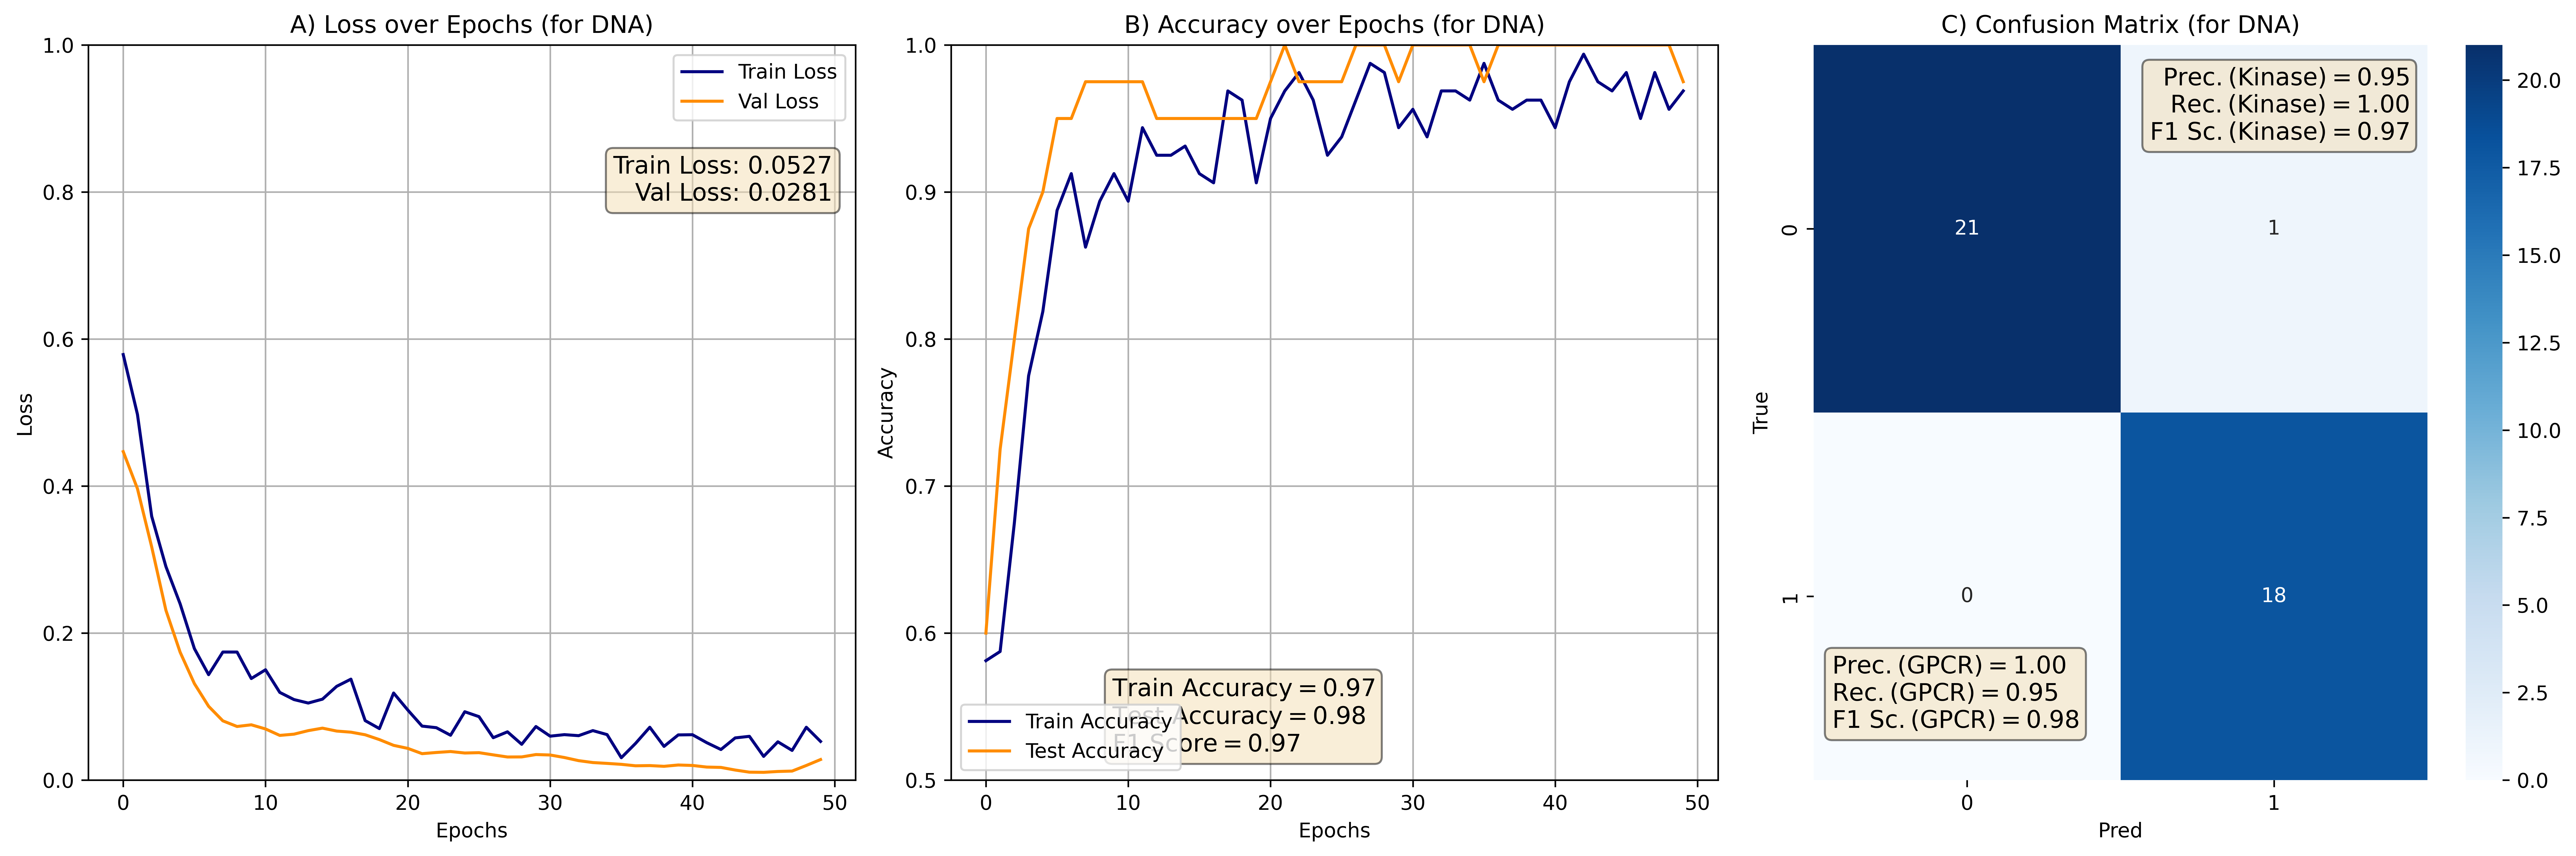

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
recall_A = recall_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')
f1_A = f1_score(y_test_classes, y_pred_classes, pos_label=0, average='binary')

precision_B = precision_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
recall_B = recall_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')
f1_B = f1_score(y_test_classes, y_pred_classes, pos_label=1, average='binary')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec.(Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (for DNA)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (for DNA)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.21, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (for DNA)')

# Place text box for class A metrics in the left of confusion matrix plot
ax[2].text(0.03, 0.17, textstr_A, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.97, 0.97, textstr_B, transform=ax[2].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()


### Step 6 (Cross Validation): For a more objective evaluation of Amino Acid seq. classification results with Convolutional Neural Networks, 10-fold Cross Validation is applied and metric means and standard deviations are calculated.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv1D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Custom activation function
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

# Complex Conv1D layer
class ComplexConv1D(Layer):
    def __init__(self, filters, kernel_size, activation=None, **kwargs):
        super(ComplexConv1D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(self.kernel_size, input_shape[-1], self.filters, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.filters, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        conv_real = tf.nn.conv1d(inputs_real, kernel_real, stride=1, padding='SAME') - tf.nn.conv1d(inputs_imag, kernel_imag, stride=1, padding='SAME') + bias_real
        conv_imag = tf.nn.conv1d(inputs_real, kernel_imag, stride=1, padding='SAME') + tf.nn.conv1d(inputs_imag, kernel_real, stride=1, padding='SAME') + bias_imag

        output = tf.complex(conv_real, conv_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

# Custom loss function
def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true)
    dF_dz_star = (y_pred - y_true)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\Kinase_GPCR_AminoAcid_Fasta_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Reshape data for Conv1D input
X = np.expand_dims(X, axis=-1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]), dtype=tf.complex64)

    complex_conv1 = ComplexConv1D(filters=8, kernel_size=3, activation=complex_tanh)(input_layer)
    complex_conv2 = ComplexConv1D(filters=4, kernel_size=3, activation=complex_tanh)(complex_conv1)
    flattened = Flatten()(complex_conv2)

    complex_dense1 = Dense(8, activation='tanh')(flattened)
    dropout1 = Dropout(0.5)(complex_dense1)
    complex_dense2 = Dense(4, activation='tanh')(dropout1)
    dropout2 = Dropout(0.5)(complex_dense2)

    output_layer = Dense(2, activation='softmax')(dropout2)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=0.001), loss=wirtinger_loss, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)  # Make fit silent

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Calculate means and standard deviations
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

std_accuracy = np.std(accuracy_scores)
std_f1 = np.std(f1_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)

print(f"\nAverage Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
print(f"Average Precision: {mean_precision:.4f} (±{std_precision:.4f})")
print(f"Average Recall: {mean_recall:.4f} (±{std_recall:.4f})")
print(f"Average F1 Score: {mean_f1:.4f} (±{std_f1:.4f})")


1/1 [==============================] - 0s 189ms/step
Fold 1 - Accuracy: 0.9500, Precision: 0.9583, Recall: 0.9444, F1 Score: 0.9488
1/1 [==============================] - 0s 381ms/step
Fold 2 - Accuracy: 0.9000, Precision: 0.9000, Recall: 0.9167, F1 Score: 0.8990
1/1 [==============================] - 0s 189ms/step
Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 208ms/step
Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
1/1 [==============================] - 0s 185ms/step
Fold 5 - Accuracy: 0.9500, Precision: 0.9545, Recall: 0.9500, F1 Score: 0.9499
1/1 [==============================] - 0s 172ms/step
Fold 6 - Accuracy: 0.9500, Precision: 0.9583, Recall: 0.9444, F1 Score: 0.9488
1/1 [==============================] - 0s 187ms/step
Fold 7 - Accuracy: 0.9000, Precision: 0.9000, Recall: 0.9000, F1 Score: 0.9000
1/1 [==============================] - 0s 172ms/step
Fold 8 - Accuracy: 0.95